# Titanic: EDA with Categorical Data

* <b>PassengerID</b>: random ID assigned to passengers
* <b>Pclass</b>: Ticket class of passenger (i.e, 1st class, 2nd class, and 3rd class)
* <b>Name</b>: Name of the passenger
* <b>Sex</b>: Male or Female
* <b>Age</b>: Age of passenger
* <b>SibSp</b>: Number of siblings accompanying passenger
* <b>Parch</b>: Number of parents and children accompanying passenger
* <b>Ticket</b>: Ticket number of passenger
* <b>Fare</b>: Fare paid for ticket
* <b>Cabin</b>: Cabin number of passenger
* <b>Embarked</b>: Port from which passenger embarked
* <b>Survived</b>: 0 and 1 for died and survived, respectively

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanicDf = pd.read_csv('./titanic.csv')

In [3]:
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Remove irrelevant and numerical features
featuresRemove = ['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare']

titanicDf.drop( featuresRemove, axis=1, inplace=True )

In [5]:
titanicDf.head()

,Survived,Pclass,Sex,Cabin,Embarked
0,0,3,male,NaN,S
1,1,1,female,C85,C
2,1,3,female,NaN,S
3,1,1,female,C123,S
4,0,3,male,NaN,S


In [6]:
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(2), object(3)
memory usage: 34.9+ KB


In [7]:

cond = titanicDf['Cabin'].notnull()
titanicDf[ cond ].groupby('Pclass').describe()


Survived                                             
          count      mean       std  min  25%  50%  75%  max
Pclass                                                      
1         176.0  0.664773  0.473417  0.0  0.0  1.0  1.0  1.0
2          16.0  0.812500  0.403113  0.0  1.0  1.0  1.0  1.0
3          12.0  0.500000  0.522233  0.0  0.0  0.5  1.0  1.0

In [8]:
print('1st Class Survivors')
print(len(titanicDf[ (titanicDf['Survived'] == 1) & (titanicDf['Pclass'] == 1) ]))

print('1st Class Perished')
print(len(titanicDf[ (titanicDf['Survived'] == 0) & (titanicDf['Pclass'] == 1) ]))


print('2nd Class Survivors')
print(len(titanicDf[ (titanicDf['Survived'] == 1) & (titanicDf['Pclass'] == 2) ]))

print('2nd Class Perished')
print(len(titanicDf[ (titanicDf['Survived'] == 0) & (titanicDf['Pclass'] == 2) ]))


print('3rd Class Survivors')
print(len(titanicDf[ (titanicDf['Survived'] == 1) & (titanicDf['Pclass'] == 3) ]))

print('3rd Class Perished')
print(len(titanicDf[ (titanicDf['Survived'] == 0) & (titanicDf['Pclass'] == 3) ]))

1st Class Survivors
136
1st Class Perished
80
2nd Class Survivors
87
2nd Class Perished
97
3rd Class Survivors
119
3rd Class Perished
372


In [9]:
titanicDf.groupby('Pclass').describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Pclass                                                      
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0

In [10]:
# Add a new feature in which each record get a 1 if cabin info exists and 0 otherwise
cond = titanicDf['Cabin'].isnull()

titanicDf['cabin_ind'] = np.where( cond, 0, 1 )

In [11]:
titanicDf.head()

,Survived,Pclass,Sex,Cabin,Embarked,cabin_ind
0,0,3,male,NaN,S,0
1,1,1,female,C85,C,1
2,1,3,female,NaN,S,0
3,1,1,female,C123,S,1
4,0,3,male,NaN,S,0


In [12]:
titanicDf.drop( 'Cabin', axis=1, inplace=True )
titanicDf.head()

,Survived,Pclass,Sex,Embarked,cabin_ind
0,0,3,male,S,0
1,1,1,female,C,1
2,1,3,female,S,0
3,1,1,female,S,1
4,0,3,male,S,0


<Figure size 432x288 with 0 Axes>

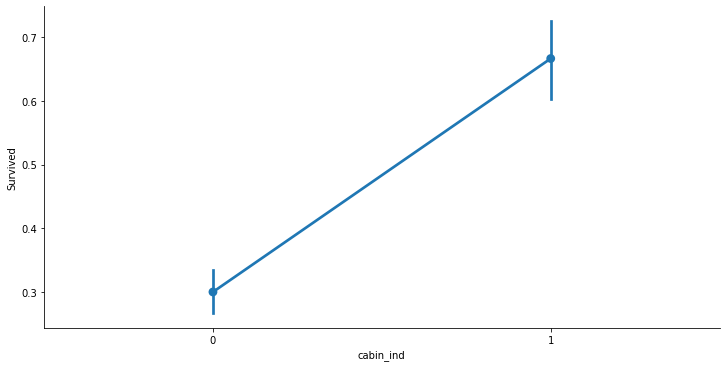

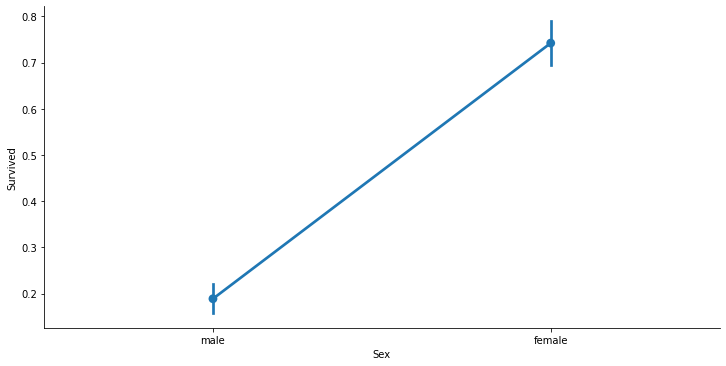

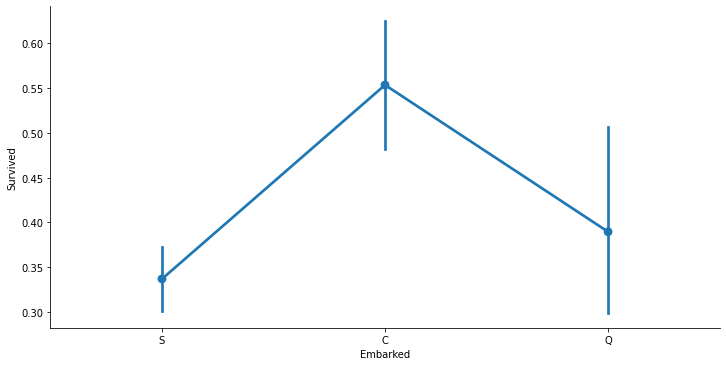

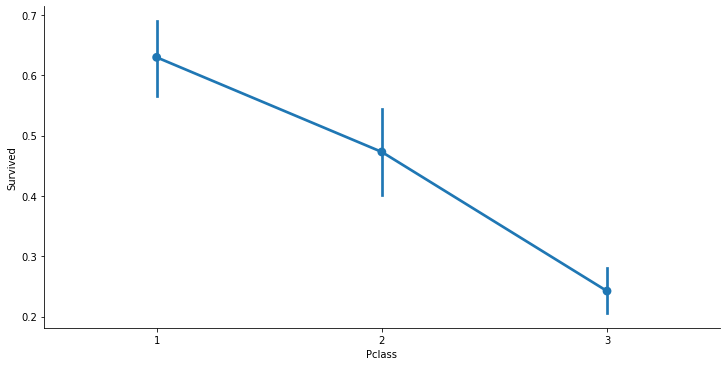

In [13]:
explanatoryFeatures = ['cabin_ind', 'Sex', 'Embarked', 'Pclass']

for index, feature in enumerate(explanatoryFeatures):
    # Embed plot inside the notebook
    plt.figure(index)

    # Add a graph inside the plot
    sns.catplot(x=feature, y='Survived', data=titanicDf, kind='point', aspect=2)

In [14]:
titanicDf.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [15]:
# Passengers who perished by embarked info
cond = titanicDf['Survived'] == 0
titanicDf[ cond ].groupby('Embarked').size()

Embarked
C     75
Q     47
S    427
dtype: int64

In [16]:
# Count of passengers by Pclass (for France)
cond = titanicDf['Embarked'] == 'C'
titanicDf[cond].groupby('Pclass').size()

Pclass
1    85
2    17
3    66
dtype: int64

In [17]:
# Count of passengers by Pclass (for England)
cond = titanicDf['Embarked'] == 'S'
titanicDf[cond].groupby('Pclass').size()

Pclass
1    127
2    164
3    353
dtype: int64

In [18]:
# Count of passengers by Pclass (for Ireland)
cond = titanicDf['Embarked'] == 'Q'
titanicDf[cond].groupby('Pclass').size()

Pclass
1     2
2     3
3    72
dtype: int64